In [41]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from joblib import dump

In [2]:
df_dep = pd.read_csv('spotify_all_genres_tracks_raw.csv')
df_dep.head()

,track_id,playlist_url,playlist_name,track_name,track_popularity,artist_name,album,album_cover,artist_genres,artist_popularity,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,4Gia17DzXBhYFbYiJj6SyW,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Working Man,51,Otis Rush,Mourning In The Morning,https://i.scdn.co/image/ab67616d0000b273fea221...,"['blues', 'blues rock', 'chicago blues', 'elec...",41,...,1,0.0436,0.492,0.000418,0.204,0.841,103.355,147800,4,blues
1,1BjYNhg7JhVfQdxqEThBwn,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Long Way Home,38,"Clarence ""Gatemouth"" Brown",Long Way Home,https://i.scdn.co/image/ab67616d0000b2730e1f13...,"['blues', 'blues rock', 'memphis blues', 'mode...",33,...,0,0.0380,0.910,0.048000,0.120,0.425,78.033,338333,4,blues
2,2Cg3GUkhjX96nO4p2WRlIa,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,She's A Sweet One,49,Junior Wells,"Calling All Blues - The Chief, Profile & USA R...",https://i.scdn.co/image/ab67616d0000b27399b18c...,"['blues', 'blues rock', 'chicago blues', 'elec...",41,...,1,0.0542,0.150,0.026500,0.202,0.713,122.863,181786,4,blues
3,5bC6ONDsL88snGN6QasjZH,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Help Me,59,Sonny Boy Williamson II,More Real Folk Blues,https://i.scdn.co/image/ab67616d0000b273b48c81...,"['acoustic blues', 'blues', 'blues rock', 'chi...",46,...,0,0.0430,0.597,0.021300,0.610,0.771,114.216,188200,4,blues
4,2TKykeHeVKsBqZC8M3SKcN,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Take Out Some Insurance,51,Jimmy Reed,Rockin' With Reed,https://i.scdn.co/image/ab67616d0000b2739b7573...,"['blues', 'blues rock', 'chicago blues', 'elec...",42,...,1,0.0513,0.663,0.000000,0.122,0.566,111.330,143332,4,blues


In [3]:
df_dep.shape

(9198, 24)

In [4]:
df_dep.drop(['track_id','track_name','artist_name','duration_ms','playlist_url','album','album_cover','artist_genres','playlist_name'], axis=1, inplace=True)
df_dep.head()

,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,51,41,0.633,0.625,0,-10.951,1,0.0436,0.492,0.000418,0.204,0.841,103.355,4,blues
1,38,33,0.728,0.054,11,-22.557,0,0.0380,0.910,0.048000,0.120,0.425,78.033,4,blues
2,49,41,0.705,0.483,1,-12.209,1,0.0542,0.150,0.026500,0.202,0.713,122.863,4,blues
3,59,46,0.745,0.436,5,-9.617,0,0.0430,0.597,0.021300,0.610,0.771,114.216,4,blues
4,51,42,0.747,0.288,9,-14.435,1,0.0513,0.663,0.000000,0.122,0.566,111.330,4,blues


In [5]:
df_dep.isnull().sum()

track_popularity     0
artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
genre                0
dtype: int64

In [6]:
df_dep.isna().sum()

track_popularity     0
artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
genre                0
dtype: int64

In [7]:
df_dep.shape

(9198, 15)

In [8]:
df_dep.dropna(inplace=True)
df_dep.shape

(9198, 15)

In [9]:
df_dep['genre'].value_counts()

genre
electronic    1725
pop           1251
rock          1134
reggae        1038
blues         1034
hiphop        1024
jazz          1002
classical      990
Name: count, dtype: int64

In [10]:
df_dep['genre'] = OrdinalEncoder().fit_transform(df_dep['genre'].to_numpy().reshape(-1,1)).astype(int)
df_dep.head()

,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,51,41,0.633,0.625,0,-10.951,1,0.0436,0.492,0.000418,0.204,0.841,103.355,4,0
1,38,33,0.728,0.054,11,-22.557,0,0.0380,0.910,0.048000,0.120,0.425,78.033,4,0
2,49,41,0.705,0.483,1,-12.209,1,0.0542,0.150,0.026500,0.202,0.713,122.863,4,0
3,59,46,0.745,0.436,5,-9.617,0,0.0430,0.597,0.021300,0.610,0.771,114.216,4,0
4,51,42,0.747,0.288,9,-14.435,1,0.0513,0.663,0.000000,0.122,0.566,111.330,4,0


In [11]:
df_dep['genre'].describe()

count    9198.000000
mean        3.472603
std         2.246827
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         7.000000
Name: genre, dtype: float64

In [12]:
sel = VarianceThreshold(threshold=(.95 * (1 - .95)))
sel.fit_transform(df_dep)

array([[5.10000e+01, 4.10000e+01, 6.25000e-01, ..., 1.03355e+02,
        4.00000e+00, 0.00000e+00],
       [3.80000e+01, 3.30000e+01, 5.40000e-02, ..., 7.80330e+01,
        4.00000e+00, 0.00000e+00],
       [4.90000e+01, 4.10000e+01, 4.83000e-01, ..., 1.22863e+02,
        4.00000e+00, 0.00000e+00],
       ...,
       [7.00000e+00, 7.00000e+00, 6.53000e-01, ..., 1.30012e+02,
        4.00000e+00, 2.00000e+00],
       [2.40000e+01, 2.70000e+01, 4.51000e-01, ..., 1.47998e+02,
        4.00000e+00, 2.00000e+00],
       [3.50000e+01, 3.70000e+01, 5.72000e-01, ..., 1.34774e+02,
        4.00000e+00, 2.00000e+00]])

In [13]:
sel.get_feature_names_out()

array(['track_popularity', 'artist_popularity', 'energy', 'key',
       'loudness', 'mode', 'acousticness', 'instrumentalness', 'valence',
       'tempo', 'time_signature', 'genre'], dtype=object)

In [14]:
df_dep.drop(['danceability','speechiness','liveness'], axis=1, inplace=True)
df_dep.head()

,track_popularity,artist_popularity,energy,key,loudness,mode,acousticness,instrumentalness,valence,tempo,time_signature,genre
0,51,41,0.625,0,-10.951,1,0.492,0.000418,0.841,103.355,4,0
1,38,33,0.054,11,-22.557,0,0.910,0.048000,0.425,78.033,4,0
2,49,41,0.483,1,-12.209,1,0.150,0.026500,0.713,122.863,4,0
3,59,46,0.436,5,-9.617,0,0.597,0.021300,0.771,114.216,4,0
4,51,42,0.288,9,-14.435,1,0.663,0.000000,0.566,111.330,4,0


Text(0.5, 1.0, 'Correlation Matrix')

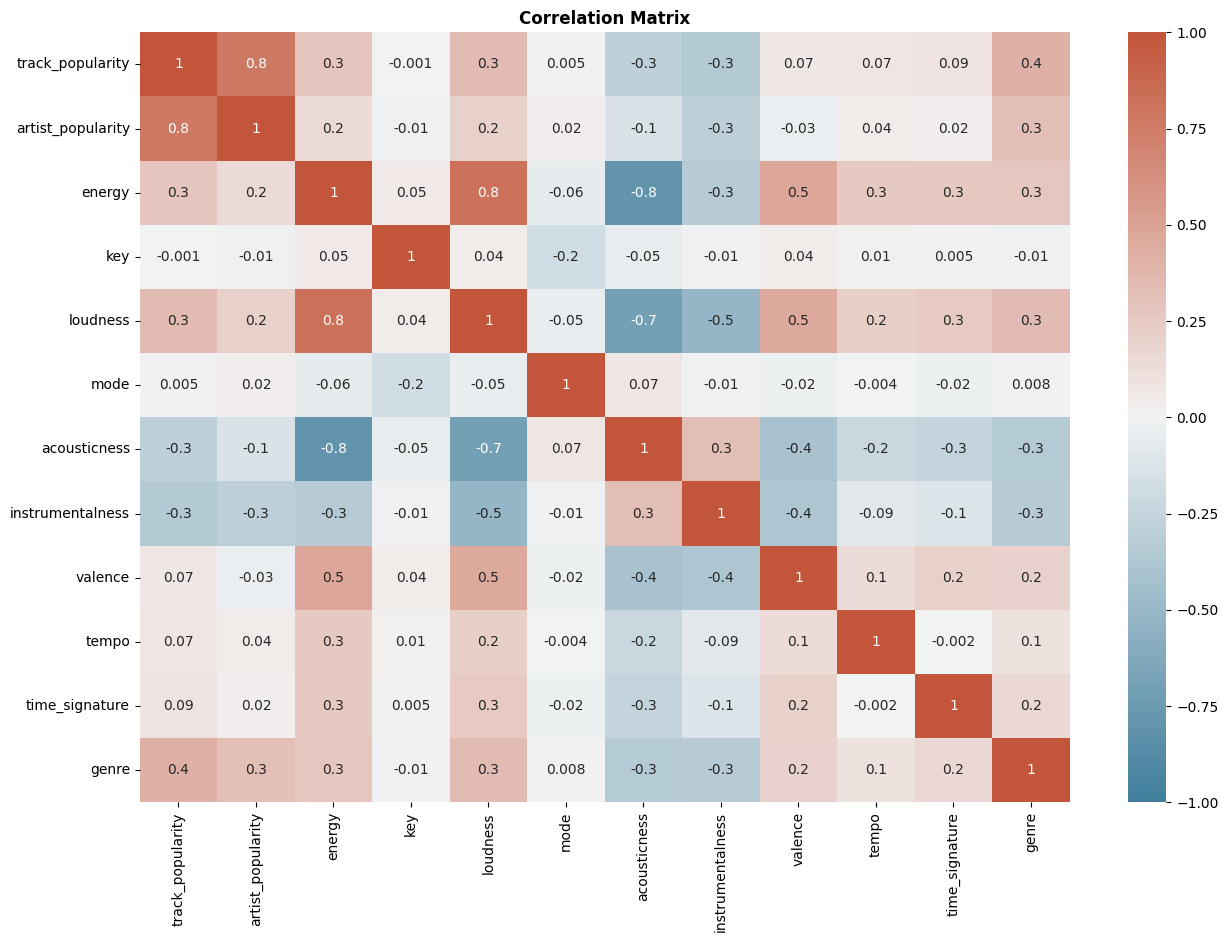

In [15]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(15, 10))
sns.heatmap(df_dep.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap=cmap)
plt.title("Correlation Matrix", fontweight='bold', fontsize='large')

In [16]:
df_dep.corr()["genre"]

track_popularity     0.417659
artist_popularity    0.325833
energy               0.273385
key                 -0.009579
loudness             0.343696
mode                 0.007526
acousticness        -0.342769
instrumentalness    -0.331822
valence              0.201079
tempo                0.096247
time_signature       0.163239
genre                1.000000
Name: genre, dtype: float64

array([[<AxesSubplot:title={'center':'track_popularity'}>,
        <AxesSubplot:title={'center':'artist_popularity'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'genre'}>]], dtype=object)

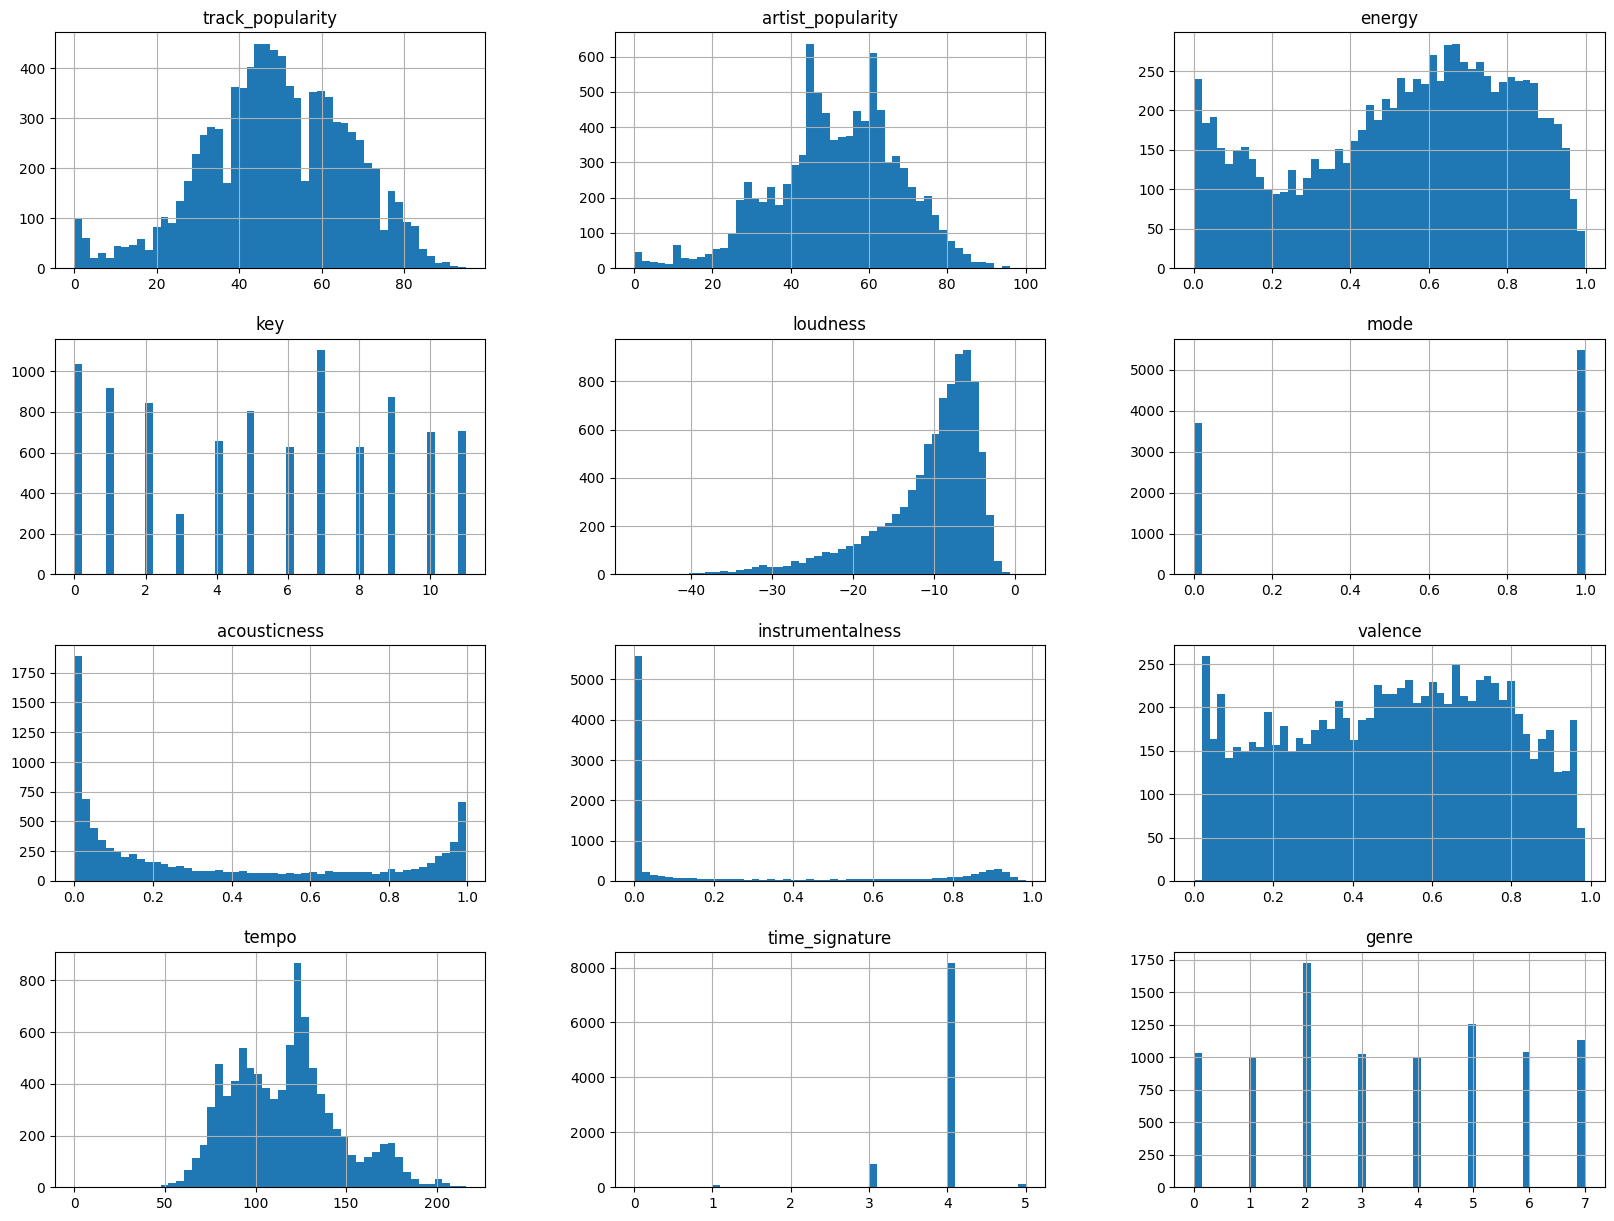

In [17]:
df_dep.hist(bins=50, figsize=(20, 15))

In [18]:
y = df_dep['genre'].to_numpy().reshape(-1,1)
X = df_dep.drop('genre',axis=1)
y.shape, X.shape, y

((9198, 1),
 (9198, 11),
 array([[0],
        [0],
        [0],
        ...,
        [2],
        [2],
        [2]]))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)
print("\n\nScaled Test Data: \n\n")
print(X_test_norm)



Scaled Test Data: 


[[0.64210526 0.51       0.71039182 ... 0.72835137 0.31252955 0.75      ]
 [0.43157895 0.4        0.58913719 ... 0.35366361 0.264132   0.75      ]
 [0.54736842 0.43       0.20132278 ... 0.6846378  0.97532846 0.75      ]
 ...
 [0.47368421 0.43       0.24641748 ... 0.60345545 0.54558136 0.75      ]
 [0.74736842 0.7        0.7053813  ... 0.36615321 0.5391552  0.75      ]
 [0.44210526 0.4        0.64425293 ... 0.63155704 0.18880413 0.75      ]]


In [21]:
# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['track_popularity','artist_popularity','key','loudness','tempo','time_signature']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

print("\n\nScaled Test Data: \n\n")
print(X_test_stand)



Scaled Test Data: 


      track_popularity  artist_popularity  energy       key  loudness  mode   
3087          0.692761          -0.008682   0.710  1.588611 -0.339413     1  \
8559         -0.448386          -0.694925   0.589 -1.221050  0.421335     1   
8328          0.179245          -0.507768   0.202  1.588611 -0.539118     0   
4454          1.662737           1.488574   0.731 -0.940084  0.664468     1   
3820          0.236303           0.552789   0.718 -1.502016  1.017393     0   
...                ...                ...     ...       ...       ...   ...   
8589         -0.106042          -0.195839   0.853 -1.502016  0.618747     1   
3859          0.179245          -0.008682   0.405 -0.097185 -0.898008     0   
2638         -0.220156          -0.507768   0.247 -0.097185 -1.314087     0   
3095          1.263335           1.176645   0.705 -1.221050  0.868608     1   
8329         -0.391328          -0.694925   0.644  0.745713  0.503449     1   

      acousticness  instrume

In [22]:
space = {
    'n_neighbors':[2,3,5,7,9,11],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'metric':['l1','l2','manhattan','cosine','euclidean','haversine','minkowski']
}

grid_knn = GridSearchCV(estimator=KNeighborsClassifier(),param_grid = space, cv=None)
grid_knn.fit(X_train_stand, y_train)

c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['l1', 'l2', 'manhattan', 'cosine',
                                    'euclidean', 'haversine', 'minkowski'],
                         'n_neighbors': [2, 3, 5, 7, 9, 11]})

In [23]:
print(f" Best Estimator {grid_knn.best_estimator_}\n Best Params {grid_knn.best_params_}\n Best Score {grid_knn.best_score_}\n")

 Best Estimator KNeighborsClassifier(algorithm='brute', metric='l1', n_neighbors=11)
 Best Params {'algorithm': 'brute', 'metric': 'l1', 'n_neighbors': 11}
 Best Score 0.6033671742808798



In [24]:
space = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter': ['best','random'],
    'max_depth':[10],
    'max_features':['auto','sqrt','log2'],
    'random_state':[42]
}

grid_dt = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid = space, cv=None)
grid_dt.fit(X_train_stand, y_train)

c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': [42], 'splitter': ['best', 'random']})

In [25]:
print(f" Best Estimator {grid_dt.best_estimator_}\n Best Params {grid_dt.best_params_}\n Best Score {grid_dt.best_score_}\n")

 Best Estimator DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       random_state=42)
 Best Params {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'random_state': 42, 'splitter': 'best'}
 Best Score 0.5455239566583641



In [27]:
space = {
    'n_estimators':[5,10,50,100,150,300],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth':[10],
    'max_features':['sqrt','log2'],
    'random_state':[42]
}

grid_rf = GridSearchCV(estimator=RandomForestClassifier(),param_grid = space, cv=5)
grid_rf.fit(X_train_stand, y_train)

c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\steph\AppData\Local\Programs\Py

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10], 'max_features': ['sqrt', 'log2'],
                         'n_estimators': [5, 10, 50, 100, 150, 300],
                         'random_state': [42]})

In [28]:
print(f" Best Estimator {grid_rf.best_estimator_}\n Best Params {grid_rf.best_params_}\n Best Score {grid_rf.best_score_}\n")

 Best Estimator RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)
 Best Params {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300, 'random_state': 42}
 Best Score 0.6754142363191138



In [45]:
knn = KNeighborsClassifier(n_neighbors=11,metric='l1',algorithm='brute')

acc = []
f1_samples = []
precision = []
recall = []

trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

for i in range(len(trainX)):
    
    # Fit
    knn.fit(trainX[i],y_train)
    filename = f'joblib_model_Knn{i}.joblib'
    dump(dt, filename)
    # Prediccion
    pred = knn.predict(testX[i])
    # Accuracy
    acc.append(np.sqrt(accuracy_score(y_test,pred)))
    # F1 samples
    f1_samples.append(np.sqrt(f1_score(y_test,pred,average='micro')))
    # Precision
    precision.append(np.sqrt(precision_score(y_test,pred,average='micro')))
    # Recall
    recall.append(np.sqrt(recall_score(y_test,pred,average='micro')))

accuracy = pd.DataFrame({'Accuracy':acc},index=['Original','Normalized','Standardized'])
f1 = pd.DataFrame({'F1 samples':f1_samples},index=['Original','Normalized','Standardized'])
pre = pd.DataFrame({'Precision':precision},index=['Original','Normalized','Standardized'])
rec = pd.DataFrame({'Recall':recall},index=['Original','Normalized','Standardized'])

scores = accuracy.join(f1, lsuffix='_caller', rsuffix='_other')
scores = scores.join(pre, lsuffix='_caller', rsuffix='_other')
scores = scores.join(rec, lsuffix='_caller', rsuffix='_other')
scores

c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,Accuracy,F1 samples,Precision,Recall
Original,0.715967,0.715967,0.715967,0.715967
Normalized,0.787953,0.787953,0.787953,0.787953
Standardized,0.772630,0.772630,0.772630,0.772630


In [44]:
dt = DecisionTreeClassifier(max_depth=10,random_state=42,criterion='entropy',max_features='auto',splitter='best')

acc = []
f1_samples = []
precision = []
recall = []

trainX = [X_train,X_train_norm,X_train_stand]
testX = [X_test,X_test_norm,X_test_stand]

for i in range(len(trainX)):
    
    # Fit
    dt.fit(trainX[i],y_train)
    filename = f'joblib_model_DT{i}.joblib'
    dump(dt, filename)
    # Predict
    pred = dt.predict(testX[i])
    acc.append(np.sqrt(accuracy_score(y_test,pred)))
    # F1 samples
    f1_samples.append(np.sqrt(f1_score(y_test,pred,average='micro')))
    # Precision
    precision.append(np.sqrt(precision_score(y_test,pred,average='micro')))
    # Recall
    recall.append(np.sqrt(recall_score(y_test,pred,average='micro')))

accuracy = pd.DataFrame({'Accuracy':acc},index=['Original','Normalized','Standardized'])
f1 = pd.DataFrame({'F1 samples':f1_samples},index=['Original','Normalized','Standardized'])
pre = pd.DataFrame({'Precision':precision},index=['Original','Normalized','Standardized'])
rec = pd.DataFrame({'Recall':recall},index=['Original','Normalized','Standardized'])

scores = accuracy.join(f1, lsuffix='_caller', rsuffix='_other')
scores = scores.join(pre, lsuffix='_caller', rsuffix='_other')
scores = scores.join(rec, lsuffix='_caller', rsuffix='_other')
scores

c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


,Accuracy,F1 samples,Precision,Recall
Original,0.748622,0.748622,0.748622,0.748622
Normalized,0.749202,0.749202,0.749202,0.749202
Standardized,0.748622,0.748622,0.748622,0.748622


In [46]:
rf = RandomForestClassifier(max_depth=10,random_state=42,criterion='gini',max_features='sqrt',n_estimators=300)

acc = []
f1_samples = []
precision = []
recall = []

trainX = [X_train,X_train_norm,X_train_stand]
testX = [X_test,X_test_norm,X_test_stand]

for i in range(len(trainX)):
    
    # Fit
    rf.fit(trainX[i],y_train)
    filename = f'joblib_model_RF{i}.joblib'
    dump(dt, filename)
    # Predict
    pred = rf.predict(testX[i])
    acc.append(np.sqrt(accuracy_score(y_test,pred)))
    # F1 samples
    f1_samples.append(np.sqrt(f1_score(y_test,pred,average='micro')))
    # Precision
    precision.append(np.sqrt(precision_score(y_test,pred,average='micro')))
    # Recall
    recall.append(np.sqrt(recall_score(y_test,pred,average='micro')))

accuracy = pd.DataFrame({'Accuracy':acc},index=['Original','Normalized','Standardized'])
f1 = pd.DataFrame({'F1 samples':f1_samples},index=['Original','Normalized','Standardized'])
pre = pd.DataFrame({'Precision':precision},index=['Original','Normalized','Standardized'])
rec = pd.DataFrame({'Recall':recall},index=['Original','Normalized','Standardized'])

scores = accuracy.join(f1, lsuffix='_caller', rsuffix='_other')
scores = scores.join(pre, lsuffix='_caller', rsuffix='_other')
scores = scores.join(rec, lsuffix='_caller', rsuffix='_other')
scores

C:\Users\steph\AppData\Local\Temp\ipykernel_17884\2931383665.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(trainX[i],y_train)
C:\Users\steph\AppData\Local\Temp\ipykernel_17884\2931383665.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(trainX[i],y_train)
C:\Users\steph\AppData\Local\Temp\ipykernel_17884\2931383665.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(trainX[i],y_train)


,Accuracy,F1 samples,Precision,Recall
Original,0.826201,0.826201,0.826201,0.826201
Normalized,0.827779,0.827779,0.827779,0.827779
Standardized,0.825675,0.825675,0.825675,0.825675


In [47]:
dt = xgb.XGBClassifier(objective='multi:softprob',num_class=8,n_estimators=200,max_depth=10,learning_rate=0.1,tree_method="hist", num_parallel_tree=100,enable_categorical=True, device="cuda")

acc = []
f1_samples = []
precision = []
recall = []

trainX = [X_train,X_train_norm,X_train_stand]
testX = [X_test,X_test_norm,X_test_stand]

for i in range(len(trainX)):
    
    # Fit
    dt.fit(trainX[i],y_train)
    filename = f'joblib_model_XGB{i}.joblib'
    dump(dt, filename)
    # Predict
    pred = dt.predict(testX[i])
    acc.append(np.sqrt(accuracy_score(y_test,pred)))
    # F1 samples
    f1_samples.append(np.sqrt(f1_score(y_test,pred,average='micro')))
    # Precision
    precision.append(np.sqrt(precision_score(y_test,pred,average='micro')))
    # Recall
    recall.append(np.sqrt(recall_score(y_test,pred,average='micro')))

accuracy = pd.DataFrame({'Accuracy':acc},index=['Original','Normalized','Standardized'])
f1 = pd.DataFrame({'F1 samples':f1_samples},index=['Original','Normalized','Standardized'])
pre = pd.DataFrame({'Precision':precision},index=['Original','Normalized','Standardized'])
rec = pd.DataFrame({'Recall':recall},index=['Original','Normalized','Standardized'])

scores = accuracy.join(f1, lsuffix='_caller', rsuffix='_other')
scores = scores.join(pre, lsuffix='_caller', rsuffix='_other')
scores = scores.join(rec, lsuffix='_caller', rsuffix='_other')
scores

c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [12:52:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [13:00:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [13:08:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\context.cc:44: No visible GPU is found, setting device to CPU.
  w

,Accuracy,F1 samples,Precision,Recall
Original,0.84029,0.84029,0.84029,0.84029
Normalized,0.84029,0.84029,0.84029,0.84029
Standardized,0.84029,0.84029,0.84029,0.84029
